## Camera

erste version (mit vimba), in der mehrere Bilder ausgelesen und erstmal statt weiterverarbeitet ausgelesen werden 

In [106]:
#Import
from vimba import *
import numpy as np
from matplotlib import pyplot as plt

In [12]:
#save np_array
def save_ar (nr, np_array):
    filename = './mls13/' + str(nr) + 'test.npy'
    with open(filename, 'wb') as f:
        np.save(f, np_array)

def open_plot (nr):
    filename = './mls13/'+ str(nr) + 'test.npy'
    with open(filename, 'rb') as f:
        ar = np.load(f)
    plt.imshow(ar, cmap='tab10')
    plt.show()

mehrere Bilder aufnehmen

In [108]:
#alte version erweitert
'''
with Vimba.get_instance () as vimba:
    cams = vimba.get_all_cameras ()
    if len(cams) > 0:
        with cams [0] as cam:
            frame = cam.get_frame ()
            np_a = frame.as_numpy_ndarray()
            save_ar(1, np_a)
            frame = cam.get_frame ()
            np_a = frame.as_numpy_ndarray()
            save_ar(2, np_a)
    else:
        print("no camera detected")
'''


'\nwith Vimba.get_instance () as vimba:\n    cams = vimba.get_all_cameras ()\n    if len(cams) > 0:\n        with cams [0] as cam:\n            frame = cam.get_frame ()\n            np_a = frame.as_numpy_ndarray()\n            save_ar(1, np_a)\n            frame = cam.get_frame ()\n            np_a = frame.as_numpy_ndarray()\n            save_ar(2, np_a)\n    else:\n        print("no camera detected")\n'

In [109]:
#synchronous_grab.py  example
with Vimba.get_instance () as vimba:
    cams = vimba.get_all_cameras ()
    print(cams)
    if len(cams) > 0:
        with cams [0] as cam:
            i = 1
            cam.ExposureAuto = 'On'
            for frame in cam.get_frame_generator(limit=200, timeout_ms=3000):
                            print('Got {}'.format(frame), flush=True)
                            np_a = frame.as_numpy_ndarray()
                            save_ar(i, np_a)
                            i += 1
    else:
        print("no camera detected")

(<vimba.camera.Camera object at 0x0000016E5B7C82B0>,)
Got Frame(id=0, status=FrameStatus.Complete, buffer=0x16e63b46040)
Got Frame(id=1, status=FrameStatus.Complete, buffer=0x16e640ba040)
Got Frame(id=2, status=FrameStatus.Complete, buffer=0x16e64a13040)
Got Frame(id=3, status=FrameStatus.Complete, buffer=0x16e655ff040)
Got Frame(id=4, status=FrameStatus.Complete, buffer=0x16e64f8a040)
Got Frame(id=5, status=FrameStatus.Complete, buffer=0x16e65b72040)
Got Frame(id=6, status=FrameStatus.Complete, buffer=0x16e660e8040)
Got Frame(id=7, status=FrameStatus.Complete, buffer=0x16e66652040)
Got Frame(id=8, status=FrameStatus.Complete, buffer=0x16e66bc2040)
Got Frame(id=9, status=FrameStatus.Complete, buffer=0x16e67134040)
Got Frame(id=10, status=FrameStatus.Complete, buffer=0x16e676a6040)
Got Frame(id=11, status=FrameStatus.Complete, buffer=0x16e67c17040)
Got Frame(id=12, status=FrameStatus.Complete, buffer=0x16e63062040)
Got Frame(id=13, status=FrameStatus.Complete, buffer=0x16e686f9040)
Got 

Bilder anschauen

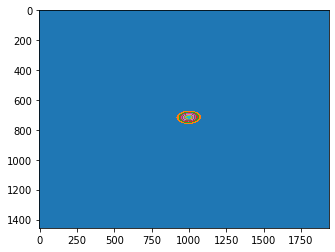

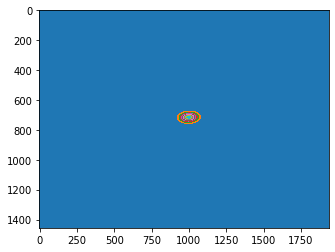

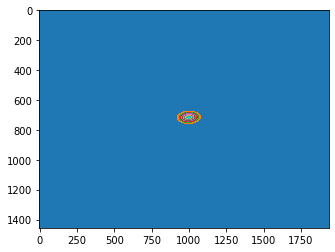

In [110]:

open_plot(1)
open_plot(50)
open_plot(99)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]
57
(163, 160)
[[0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]]


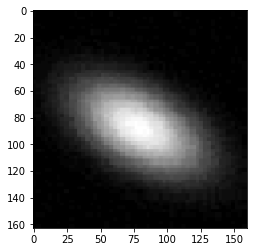

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def save_as_png (nr):
    filename = 'D:\\HZB\\Camera_Data\\test_roi\\'+ str(nr) + 'test.npy'
    with open(filename, 'rb') as f:
        ar = np.load(f)
        cv2.imwrite("bild_roi.png", ar) 

save_as_png(2)

img = cv2.imread('rotation3.png')
print(img)
print(np.amax(img))

def rgb2gray(Img):
    row,col,ch = Img.shape
    g = [ ]  
    for i in range(row) :
        a = []
        for j in range(col):
            a.append(Img[i,j,0])
        g.append(a)
    gr = np.array(g)
    return gr

grIm = rgb2gray(img)
print(grIm.shape)
print(grIm)
plt.imshow(grIm, cmap='gray')
plt.show()

def save_ar (np_array):
    filename = 'rotation3.npy'
    with open(filename, 'wb') as f:
        np.save(f, np_array)

save_ar(grIm)

In [2]:
import cv2
import numpy as np


def save_as_png (nr):
    filename = 'D:\\HZB\\Camera_Data\\mls13\\'+ str(nr) + 'test.npy'
    with open(filename, 'rb') as f:
        ar = np.load(f)
        cv2.imwrite("mls.png", ar) 

save_as_png(2)